<a href="https://colab.research.google.com/github/lwllucas/DS-MachineLearningProjects/blob/master/Prediction_of_Housing_Prices_in_Ames%2CIowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ITI103: Essentials of Machine Learning - Assignment 1

## Introduction

In this assignment, you will work a data set based on [housing prices in Ames, Iowa](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). It is a modernized alternative to the well-known Boston Housing dataset. 

You may access the dataset from [https://raw.githubusercontent.com/nyp-sit/sdaai-iti103/master/assignment1/data/ames_housing_prices.csv](https://raw.githubusercontent.com/nyp-sit/sdaai-iti103/master/assignment1/data/ames_housing_prices.csv) For a detailed description of each field (feature), you can refer to the following [file](data/data_description.txt)


## Question 1

* Import the data using Pandas and examine the shape. There are 79 feature columns plus the predictor, the sale price (`SalePrice`). 
* There are three different types: integers (`int64`), floats (`float64`), and strings (`object`, categoricals). Examine how many there are of each data type. 

In [ ]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np

## START YOUR CODE

# Import the data using the file path
url = "https://raw.githubusercontent.com/nyp-sit/sdaai-iti103/master/assignment1/data/ames_housing_prices.csv"
df = pd.read_csv(url)

# examine the shape 
print("----- Shape -----")
print(df.shape)

# Display value counts of each data type
print("\n----- Value counts -----")
print(df.dtypes.value_counts())
## END YOUR CODE

----- Shape -----
(1379, 80)

----- Value counts -----
object     43
float64    21
int64      16
dtype: int64


## Question 2

Find out how many columns are categorical (hint: string) columns and if you were to one-hot-encode, how many extra columns are created.

In [ ]:
## START YOUR CODE
str_cols = df.dtypes == np.object
print(str_cols)
cat_cols = df.columns[str_cols]
print(cat_cols)
print(str(len(cat_cols))+ " columns are categorical")
## END YOUR CODE

1stFlrSF        False
2ndFlrSF        False
3SsnPorch       False
Alley            True
BedroomAbvGr    False
                ...  
WoodDeckSF      False
YearBuilt       False
YearRemodAdd    False
YrSold          False
SalePrice       False
Length: 80, dtype: bool
Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')
43 columns are categorical


In [ ]:
## START YOUR CODE

# Determine how many extra columns would be created
num_ohc_cols = (df[cat_cols]
               .apply(lambda x: x.nunique())
               .sort_values(ascending=False))

print(f"Num OHC columns = {num_ohc_cols.sum()}")

# No need to encode if there is only one value
mul_val_cols = num_ohc_cols.loc[num_ohc_cols>1]

#Number of columns after ohcs
print(f"Num columns after ohcs = {mul_val_cols.sum()}")

num_ohc_cols = mul_val_cols

## END YOUR CODE

Num OHC columns = 258
Num columns after ohcs = 258


## Question 3

Create a new data set where all of the above categorical features will be one-hot encoded. We can fit this data and see how it affects the results.

* Used the dataframe `.copy()` method to create a completely separate copy of the dataframe for one-hot encoding
* On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. 


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
ohc = OneHotEncoder()

In [ ]:
## START YOUR CODE HERE

# Duplicate original Data Frame
data_ohc = df.copy()

for col in num_ohc_cols.index:

  # Integer encode the string categories
  dat = le.fit_transform(data_ohc[col]).astype(np.int)

  # Remove the original column from the data frame
  data_ohc = data_ohc.drop(col, axis = 1)

  # One hot encode the data -- this returns a sparse array
  new_dat = ohc.fit_transform(dat.reshape(-1,1))
  
  # Create unique column names
  n_cols = new_dat.shape[1]
  col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

  # Create the new data frame
  new_df = pd.DataFrame(new_dat.toarray(),
                        index = data_ohc.index,
                        columns = col_names)

  data_ohc = pd.concat([data_ohc, new_df], axis=1)
  #print("This is data ohc")
  #print(data_ohc)
  # print("before")
  # print(data_ohc.shape)
  # print(data_ohc)

data_ohc.head()


# ## END YOUR CODE

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice,Neighborhood_0,Neighborhood_1,Neighborhood_2,...,BsmtCond_2,BsmtCond_3,LotShape_0,LotShape_1,LotShape_2,LotShape_3,MasVnrType_0,MasVnrType_1,MasVnrType_2,MasVnrType_3,ExterQual_0,ExterQual_1,ExterQual_2,ExterQual_3,ExterCond_0,ExterCond_1,ExterCond_2,ExterCond_3,PoolQC_0,PoolQC_1,PoolQC_2,PoolQC_3,Alley_0,Alley_1,Alley_2,GarageFinish_0,GarageFinish_1,GarageFinish_2,LandSlope_0,LandSlope_1,LandSlope_2,PavedDrive_0,PavedDrive_1,PavedDrive_2,CentralAir_0,CentralAir_1,Street_0,Street_1,Utilities_0,Utilities_1
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,0,2,548.0,2,2003.0,1710.0,1,1,8450.0,65.0,0.0,60,196.0,0.0,2,61.0,5,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,1,2,460.0,2,1976.0,1262.0,0,1,9600.0,80.0,0.0,20,0.0,0.0,5,0.0,8,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,1,2,608.0,2,2001.0,1786.0,1,1,11250.0,68.0,0.0,60,162.0,0.0,9,42.0,5,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,1,1,642.0,3,1998.0,1717.0,0,1,9550.0,60.0,0.0,70,0.0,0.0,2,35.0,5,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,1,2,836.0,3,2000.0,2198.0,1,1,14260.0,84.0,0.0,60,350.0,0.0,12,84.0,5,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


## Question 4

* Create train and test splits of both data sets. To ensure the data gets split the same way, use the same `random_state` in each of the two splits.
* Decide if you need to do Stratified splitting. 


In [ ]:
# first 37 cols are numerical , rest are ohe
# train - test split on entire data -> data_ohc

In [ ]:
## START YOUR CODE HERE

from sklearn.model_selection import train_test_split
from pprint import pprint

y_label = 'SalePrice'

# all features
feature_cols = [x for x in data_ohc.columns if x != y_label ]

X = data_ohc[feature_cols]
y = data_ohc[y_label]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))


## END YOUR CODE

1103
1103
276
276


## Question 5

* Scale the all the numerical (non OHE) features using one of the following: `StandardScaler`, `MinMaxScaler`
* Be sure to fit the scaler on *ONLY* the training data, but then apply it to both the train and test data identically.
* Optional: You may also want to calculate the skew of your numeric features and decide if you need to do log transform. 

Note that the error values on the one-hot encoded data are very different for the train and test data. In particular, the errors on the test data are much higher. Based on the lecture, this is because the one-hot encoded model is overfitting the data. We will learn how to deal with issues like this in the next lesson.

In [ ]:
## START YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# first 37 (numerical) excluding the label = 36
float_cols_names = data_ohc.columns[:36]
print(f"Scaling applied for {float_cols_names}")

X_train[float_cols_names] = scaler.fit_transform(X_train[float_cols_names])
X_test[float_cols_names] = scaler.transform(X_test[float_cols_names])
## END YOUR CODE

Scaling applied for Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

## Question 6

* Fit a basic linear regression model on the training data. 
* Calculate the mean squared error on both the train and test sets for the model

In [ ]:
## START YOUR CODE HERE
from sklearn.linear_model import LinearRegression

# initliase model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print(f"Score: {lr_model.score(X_test, y_test)}")

Score: 0.7685633726730426


In [ ]:
from sklearn.metrics import mean_squared_error

# predicting for the train and test
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)


# Mean squared error for both ohc and non ohc test and train set
mse_test = mean_squared_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

print(f"MSE-Train: {mse_train}; MSE-Test: {mse_test}")

## END YOUR CODE HERE

MSE-Train: 352258642.7050658; MSE-Test: 1379077082.2053638


## Question 7

Plot predictions vs actual the models.

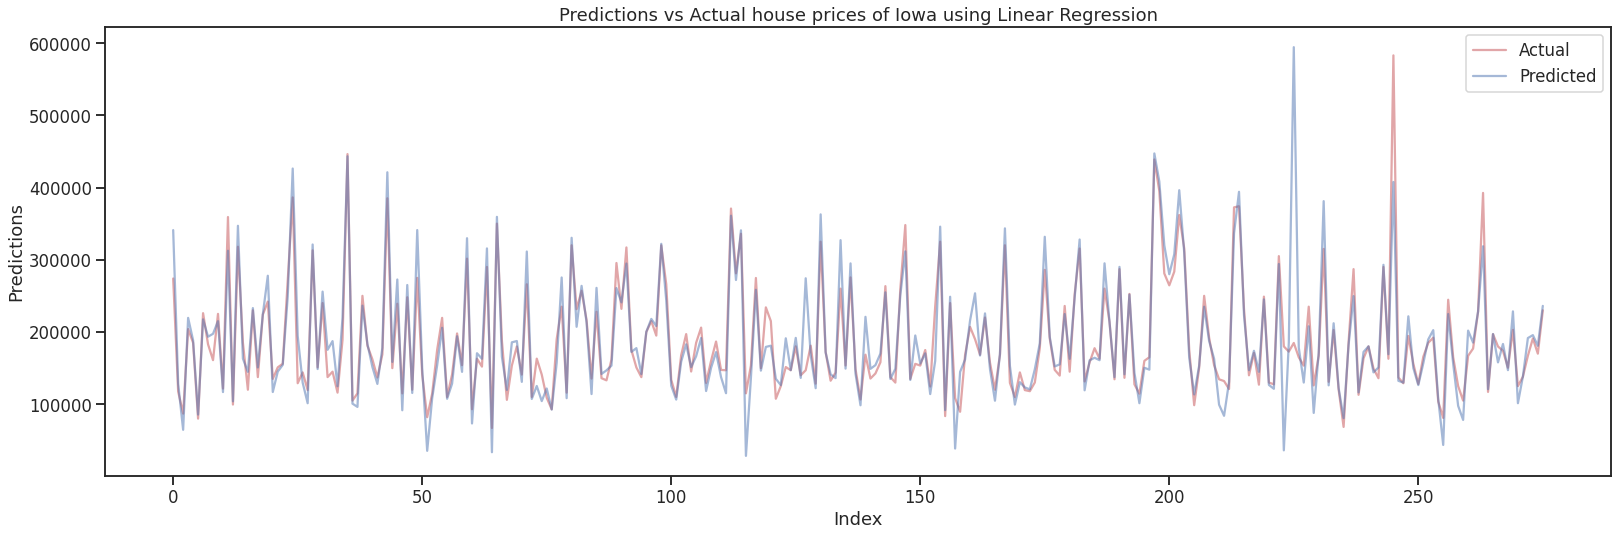

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## START YOUR CODE HERE
sns.set(rc={'figure.figsize':(27,8.27)})
sns.set_context('notebook')
sns.set_context('talk')
sns.set_style('ticks')
ax = plt.axes()

#using y_test_ohc and y_test_pred
ax.plot([x for x in range(len(y_test))], y_test, alpha=0.5, label = 'Actual' ,color = 'r')
ax.plot([x for x in range(len(y_test))], y_test_pred, alpha=0.5, label = 'Predicted' ,color = 'b')

# plt.xticks(rotation = 90)
ax.set(xlabel = 'Index',
       ylabel = 'Predictions',
       title='Predictions vs Actual house prices of Iowa using Linear Regression')

ax.legend()
## END YOUR CODE

## Question 8

What can you conclude from the train and test set predictions?

**Your answer**: 

With the One hot encoded data, for training and testing it seems that the mean squared error for testing is higher than training

One possibility is that the model could be overfitted as there are too many features after we one hot encode the original features.

Max score of .768, since model is not that complex, we cant expect it to have a high accuracy only when there is direct realtionship then we can say LR is a good fit. 

The highest correlation score from correlation matrix would only give a maximum score of 0.78. Therefore this is the best results we can obtain from linear regression

